<a href="https://colab.research.google.com/github/Amogh-S-Acharya/ai-ml_basic_requirement/blob/main/Student%20Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()



Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix


In [6]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Create average score column
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Create binary column for pass/fail (1 = pass if avg >= 50)
df['pass_fail'] = df['average_score'].apply(lambda x: 1 if x >= 50 else 0)

# Convert categorical features using one-hot encoding
df_encoded = pd.get_dummies(df.drop(['math score', 'reading score', 'writing score'], axis=1), drop_first=True)

df_encoded.head()


,average_score,pass_fail,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72.666667,1,False,True,False,False,False,True,False,False,False,False,True,True
1,82.333333,1,False,False,True,False,False,False,False,False,True,False,True,False
2,92.666667,1,False,True,False,False,False,False,False,True,False,False,True,True
3,49.333333,0,True,False,False,False,False,False,False,False,False,False,False,True
4,76.333333,1,True,False,True,False,False,False,False,False,True,False,True,True


In [8]:
X = df_encoded.drop(['average_score', 'pass_fail'], axis=1)
y_reg = df_encoded['average_score']
y_log = df_encoded['pass_fail']

# Split for linear regression
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Split for logistic regression
_, _, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [9]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train_reg)

preds_lin = lin_model.predict(X_test)
mse = mean_squared_error(y_test_reg, preds_lin)

print("📊 Linear Regression MSE:", mse)


📊 Linear Regression MSE: 179.60234233623538


✅ Logistic Regression Accuracy: 0.86


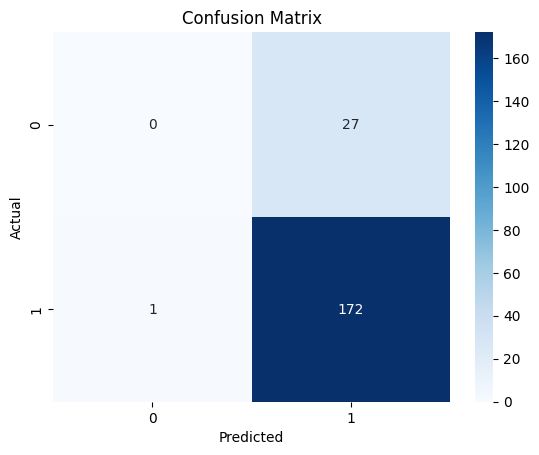

In [10]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train_log)

preds_log = log_model.predict(X_test)

acc = accuracy_score(y_test_log, preds_log)
print("✅ Logistic Regression Accuracy:", acc)

# Plot Confusion Matrix
cm = confusion_matrix(y_test_log, preds_log)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


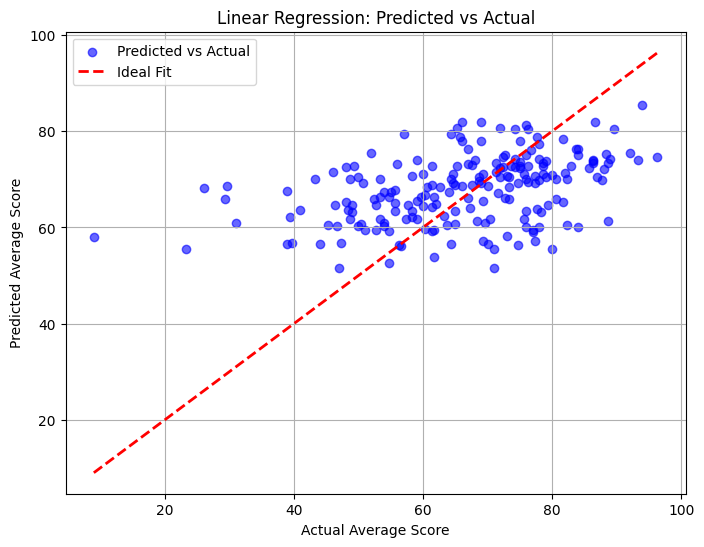

In [11]:
# Plotting predicted vs actual average scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, preds_lin, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Average Score")
plt.ylabel("Predicted Average Score")
plt.title("Linear Regression: Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()


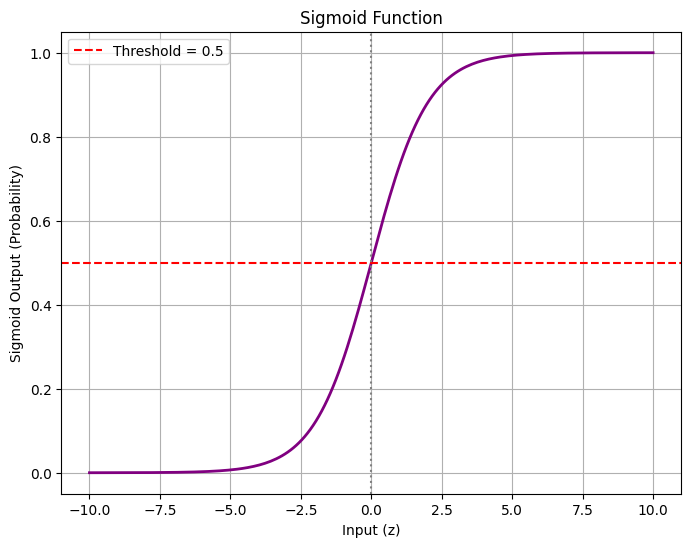

In [13]:
x = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-x))

plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid, color='purple', linewidth=2)
plt.title("Sigmoid Function")
plt.xlabel("Input (z)")
plt.ylabel("Sigmoid Output (Probability)")
plt.grid(True)
plt.axhline(0.5, color='red', linestyle='--', label="Threshold = 0.5")
plt.axvline(0, color='grey', linestyle=':')
plt.legend()
plt.show()
